# Multi-Armed Bandit Algorithm using ε-Greedy Strategy

This code implements an **ε-greedy multi-armed bandit algorithm** to solve the problem as required in the assignment.

## Problem Description
- We have `n` arms (slot machines for example), each with an unknown probability distribution for rewards.
- The agent plays `p = 2000` times and updates its estimates of the best arm.
- The ε-greedy algorithm is used to ensure a balance of exploitation and exploration:
  - With probability `1 - ε`, selects the best-known arm (exploitation).
  - With probability `ε`, selects a random arm (exploration).
- Results are plotted and include:
  - Average reward over time
  - Optimal action selection percentage over time
- Below these plots are also averaged plots from running the 2000 plays 2000 times for each n-arms setup.

## Parameters
- `n = 5, 10, 20` (number of arms)
- `p = 2000` (total plays)
- `ε = 0.1` (exploration probability)
- `t = 2000` (2000 tasks for averaged results)


In [15]:

import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, n_arms=10, epsilon=0.1, plays=2000):
        self.n_arms = n_arms  # Number of arms
        self.epsilon = epsilon  # Exploration probability
        self.plays = plays  # Total number of plays
        
        #Set true values for each arm (from a normal distribution)
        self.true_values = np.random.normal(0, 1, self.n_arms)
        
        #Set estimated values for each arm (initialised to zero)
        self.estimated_values = np.zeros(self.n_arms)
        
        #Start count of times each arm is pulled
        self.arm_counts = np.zeros(self.n_arms)
        
        #Track rewards and optimal action selections
        self.rewards_history = []
        self.optimal_action_history = []

    #Function to select the action to be taken based on 1-epsilon value. (see selection in report)
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_arms)  #Exploration (random choice)
        else:
            return np.argmax(self.estimated_values)  #Exploitation (best-known action)
    
    #function to perform a step of the algorithm
    def step(self):
        action = self.select_action()
        
        #generate a reward based on the true value of the chosen arm
        reward = np.random.normal(self.true_values[action], 1)
        
        #track optimal action choice for plotting
        optimal_action = np.argmax(self.true_values)
        self.optimal_action_history.append(action == optimal_action)
        
        #update estimated values using incremental mean equation (also see about equation in report)
        self.arm_counts[action] += 1
        self.estimated_values[action] += (reward - self.estimated_values[action]) / self.arm_counts[action]
        
        #Store reward history for plotting
        self.rewards_history.append(reward)

    #function to run the bandit simulation for the given number of plays.
    def run(self):
        for _ in range(self.plays):
            self.step()
    
    #finction to plot average rewards and optimal action percentages.
    def plot_results(self):
        avg_rewards = np.cumsum(self.rewards_history) / np.arange(1, self.plays + 1)
        optimal_action_pct = 100 * np.cumsum(self.optimal_action_history) / np.arange(1, self.plays + 1)

        #plot average reward over time
        plt.figure(figsize=(12, 5))
        plt.plot(avg_rewards, label="Average Reward")
        plt.xlabel("Plays")
        plt.ylabel("Average Reward")
        plt.title(f"Multi-Armed Bandit: Average Reward Over Time (ε={self.epsilon})")
        plt.legend()
        plt.show()

        #plot optimal action selection percentage over time
        plt.figure(figsize=(12, 5))
        plt.plot(optimal_action_pct, label="Optimal Action Percentage", color="green")
        plt.xlabel("Plays")
        plt.ylim(0, 100)
        plt.ylabel("Optimal Action Selection (%)")
        plt.title(f"Multi-Armed Bandit: Optimal Action Selection (ε={self.epsilon})")
        plt.legend()
        plt.show()


In [16]:
#Store results for different n and epsilon for comparison plot later
results = {}

arms_list = [5, 10, 20] #to run with different n of arms
epsilon_list = [0, 0.1, 0.01] #to run with these differetnt epsilon values

#loops to run each epsilon for each number of arms.
for n_arms in arms_list:
    results[n_arms] = {}  #Create dictionary for each n to store results
    for epsilon in epsilon_list:
        print(f"Running for n={n_arms} arms, ε={epsilon}...")
        bandit = MultiArmedBandit(n_arms=n_arms, epsilon=epsilon, plays=2000)
        bandit.run()
        
        #Compute average rewards over time
        avg_rewards = np.cumsum(bandit.rewards_history) / np.arange(1, bandit.plays + 1)
        
        #Compute optimal action selection percentage
        optimal_action_pct = 100 * np.cumsum(bandit.optimal_action_history) / np.arange(1, bandit.plays + 1)

        #Store results for plot
        results[n_arms][epsilon] = (avg_rewards, optimal_action_pct)


Running for n=5 arms, ε=0...
Running for n=5 arms, ε=0.1...
Running for n=5 arms, ε=0.01...
Running for n=10 arms, ε=0...
Running for n=10 arms, ε=0.1...
Running for n=10 arms, ε=0.01...
Running for n=20 arms, ε=0...
Running for n=20 arms, ε=0.1...
Running for n=20 arms, ε=0.01...


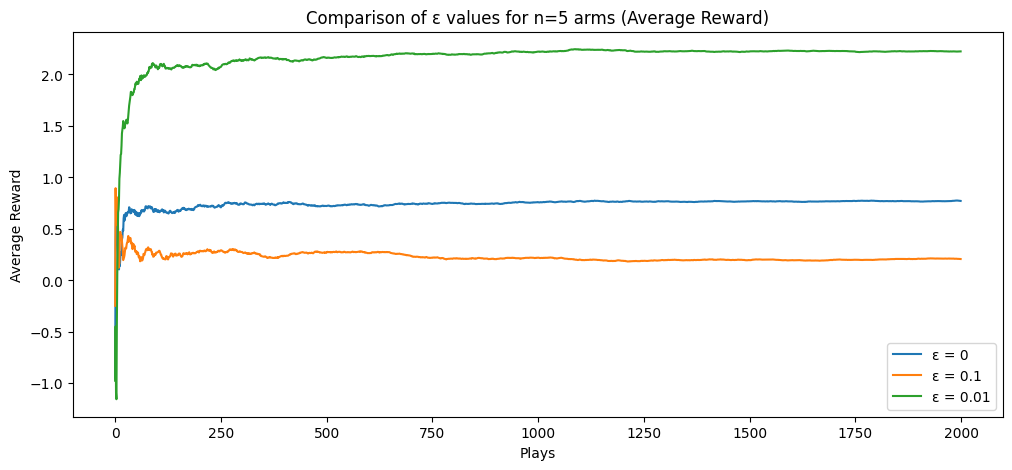

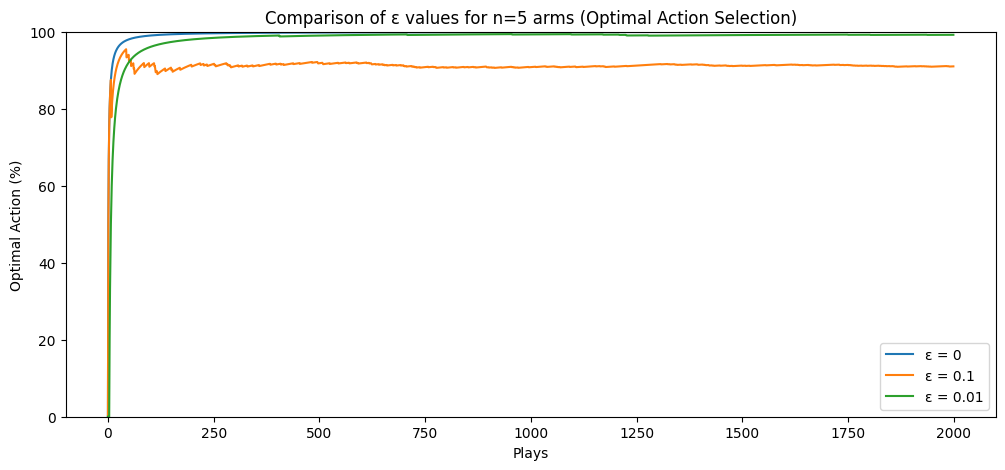

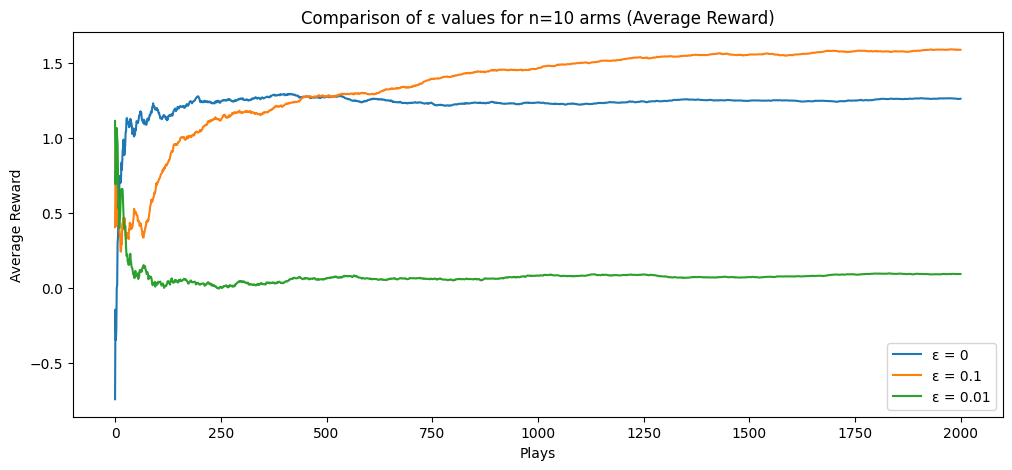

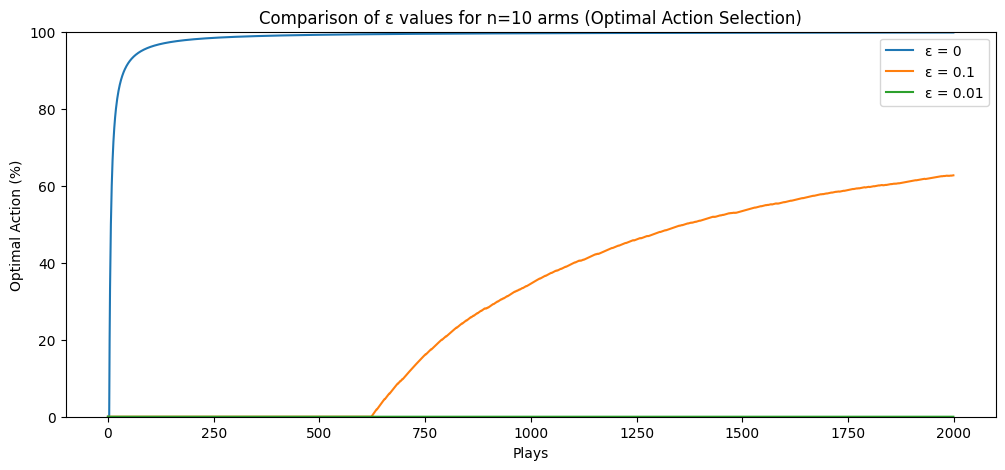

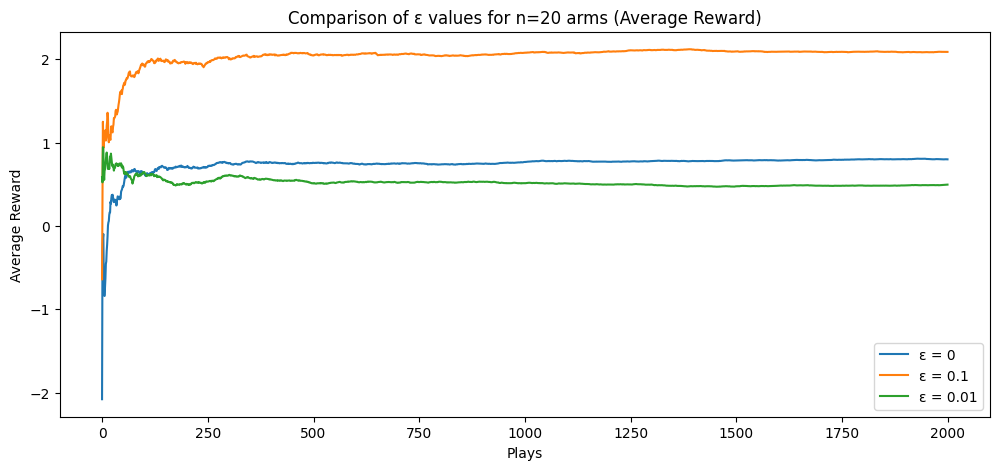

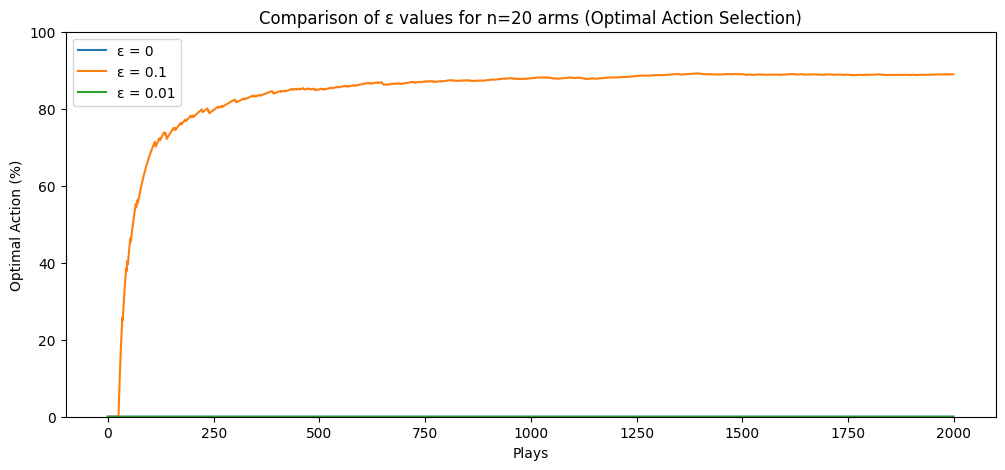

In [17]:
#Comparative plot for different ε values per N value (on the same graph) using results from befoer
for n_arms in results.keys():
    plt.figure(figsize=(12, 5))
    for epsilon in results[n_arms].keys():
        plt.plot(results[n_arms][epsilon][0], label=f"ε = {epsilon}")
    plt.xlabel("Plays")
    plt.ylabel("Average Reward")
    plt.title(f"Comparison of ε values for n={n_arms} arms (Average Reward)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    for epsilon in results[n_arms].keys():
        plt.plot(results[n_arms][epsilon][1], label=f"ε = {epsilon}")
    plt.xlabel("Plays")
    plt.ylabel("Optimal Action (%)")
    plt.ylim(0, 100)
    plt.title(f"Comparison of ε values for n={n_arms} arms (Optimal Action Selection)")
    plt.legend()
    plt.show()


In [18]:

#Run the experiment 2000 times and compute average results
num_runs = 2000
results_avg = {}

arms_list = [5, 10, 20]
epsilon_list = [0, 0.1, 0.01]

for n_arms in arms_list:
    results_avg[n_arms] = {}
    for epsilon in epsilon_list:
        print(f"Running 2000 experiments for n={n_arms} arms, ε={epsilon}...")
        
        #Initialise storage for rewards and optimal action selection as zeros
        all_avg_rewards = np.zeros((num_runs, 2000))
        all_optimal_actions = np.zeros((num_runs, 2000)) 
        
        for run in range(num_runs):
            bandit = MultiArmedBandit(n_arms=n_arms, epsilon=epsilon, plays=2000)
            bandit.run()
            
            #Compute rewards and optimal action selection percentage
            all_avg_rewards[run, :] = np.cumsum(bandit.rewards_history) / np.arange(1, bandit.plays + 1)
            all_optimal_actions[run, :] = 100 * np.cumsum(bandit.optimal_action_history) / np.arange(1, bandit.plays + 1)

        #Compute average mean across all runs for rewards and optimal action %s
        avg_rewards = np.mean(all_avg_rewards, axis=0)
        avg_optimal_actions = np.mean(all_optimal_actions, axis=0)
        
        #Store results ti plot later
        results_avg[n_arms][epsilon] = (avg_rewards, avg_optimal_actions)


Running 2000 experiments for n=5 arms, ε=0...
Running 2000 experiments for n=5 arms, ε=0.1...
Running 2000 experiments for n=5 arms, ε=0.01...
Running 2000 experiments for n=10 arms, ε=0...
Running 2000 experiments for n=10 arms, ε=0.1...
Running 2000 experiments for n=10 arms, ε=0.01...
Running 2000 experiments for n=20 arms, ε=0...
Running 2000 experiments for n=20 arms, ε=0.1...
Running 2000 experiments for n=20 arms, ε=0.01...


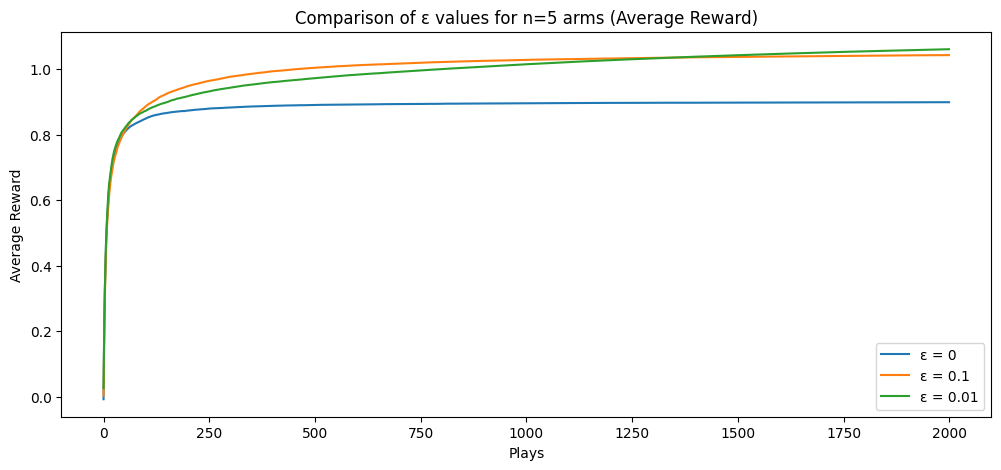

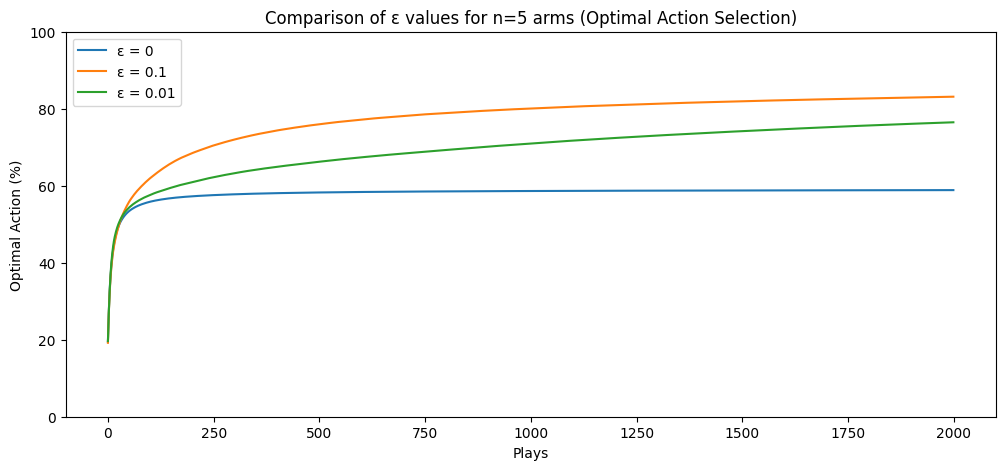

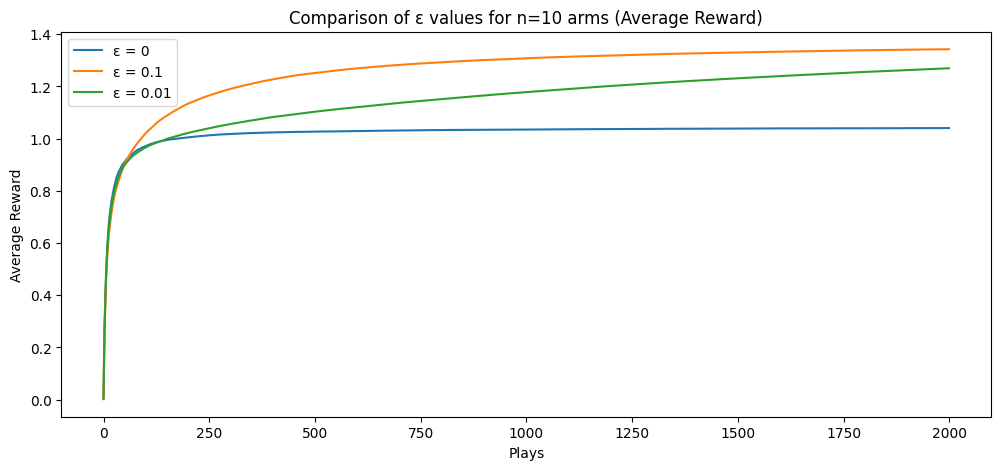

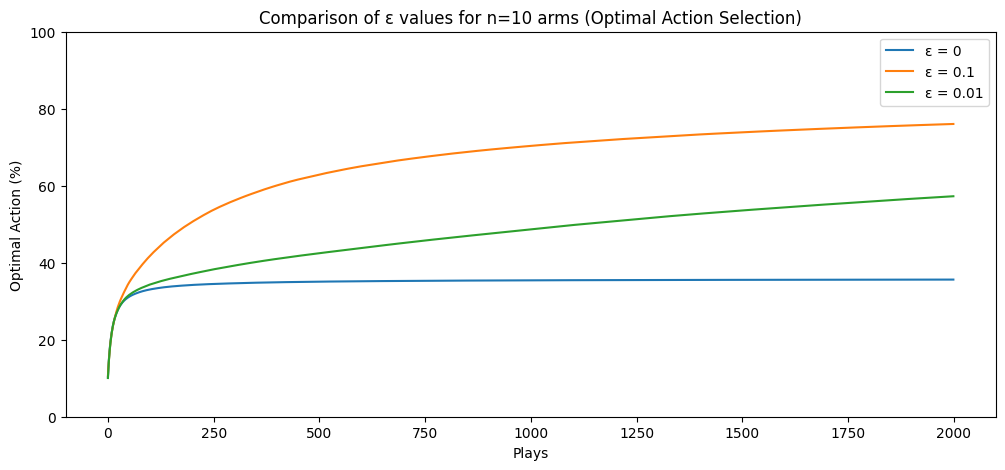

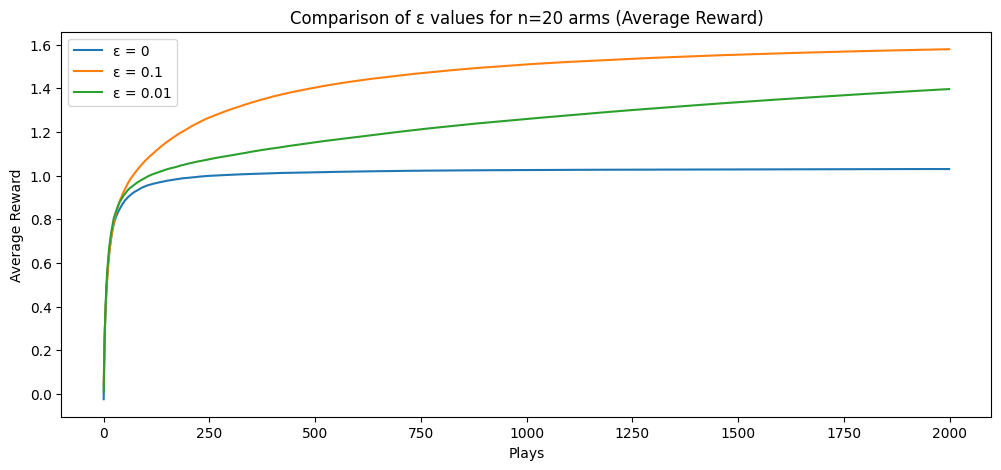

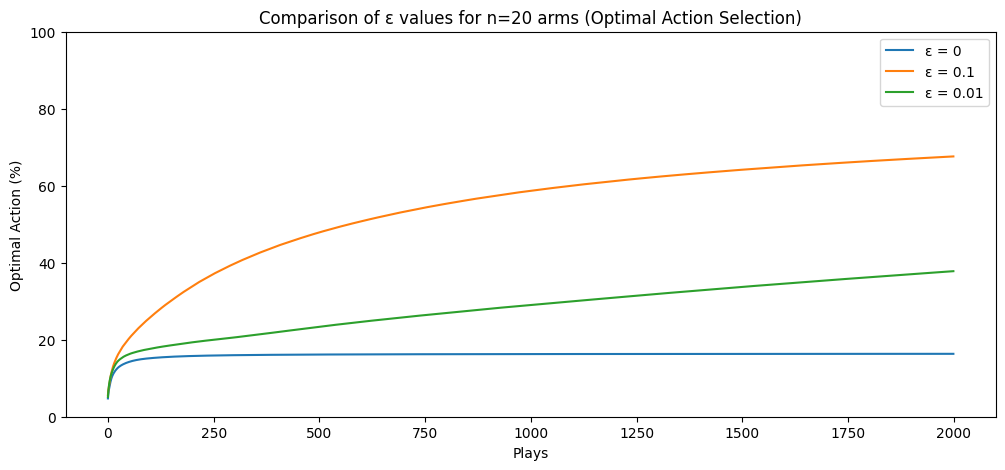

In [19]:

#Create comparative plots for different ε values per N (Averaged over the 2000 runs)
for n_arms in results_avg.keys():
    plt.figure(figsize=(12, 5))
    for epsilon in results_avg[n_arms].keys():
        plt.plot(results_avg[n_arms][epsilon][0], label=f"ε = {epsilon}")
    plt.xlabel("Plays")
    plt.ylabel("Average Reward")
    plt.title(f"Comparison of ε values for n={n_arms} arms (Average Reward)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    for epsilon in results_avg[n_arms].keys():
        plt.plot(results_avg[n_arms][epsilon][1], label=f"ε = {epsilon}")
    plt.xlabel("Plays")
    plt.ylabel("Optimal Action (%)")
    plt.ylim(0, 100)
    plt.title(f"Comparison of ε values for n={n_arms} arms (Optimal Action Selection)")
    plt.legend()
    plt.show()
